In [1]:
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

df = pd.read_csv('POP.csv')
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [3]:
df = df[['date', 'value']]
df.head()

,date,value
0,1952-01-01,156309.0
1,1952-02-01,156527.0
2,1952-03-01,156731.0
3,1952-04-01,156943.0
4,1952-05-01,157140.0


In [4]:
df.date.tail()

811    2019-08-01
812    2019-09-01
813    2019-10-01
814    2019-11-01
815    2019-12-01
Name: date, dtype: object

In [5]:
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

df.isnull(). values. any() 

Number of NaN values: 0


False

In [6]:
df.date = pd.to_datetime(df.date)
df['population']=df['value']
df = df[['population', 'date']]
df.head()

,population,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [7]:
import matplotlib.pyplot as plt

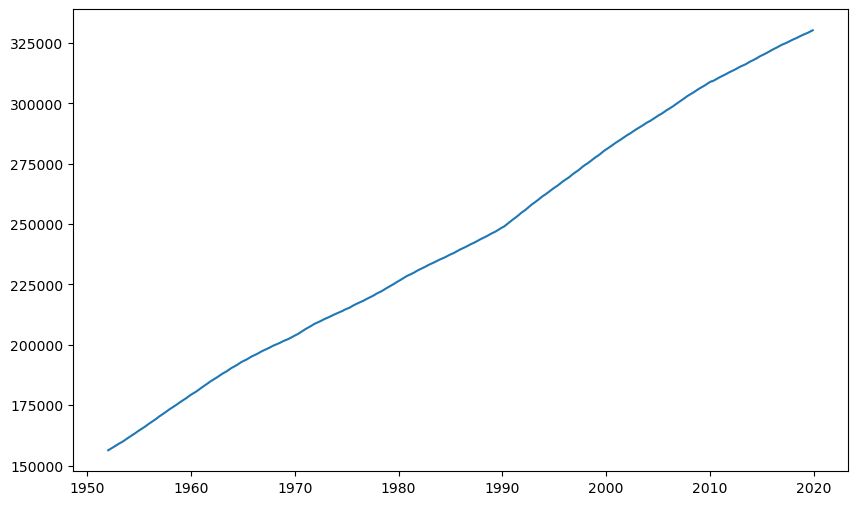

In [8]:
plt.plot(df.date, df.population)

In [9]:
len(df)

816

In [10]:
df.describe()

,population,date
count,816.000000,816
mean,243847.767826,1985-12-15 23:00:00
min,156309.000000,1952-01-01 00:00:00
25%,201725.250000,1968-12-24 06:00:00
50%,239557.500000,1985-12-16 12:00:00
75%,289364.250000,2002-12-08 18:00:00
max,330309.946000,2019-12-01 00:00:00
std,50519.140567,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   population  816 non-null    float64       
 1   date        816 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [12]:
indexedDataset = df.set_index(['date'])
indexedDataset.head(5)

,population
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


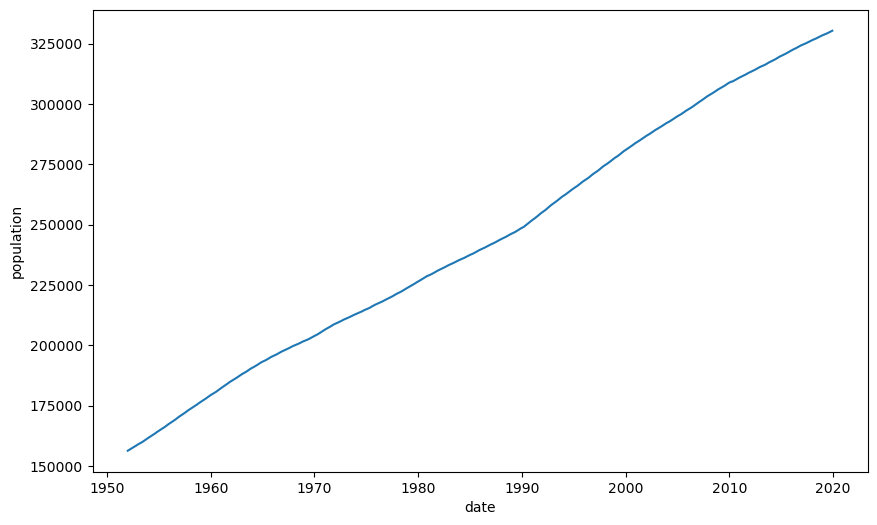

In [13]:
plt.xlabel('date')
plt.ylabel('population')
plt.plot(indexedDataset)

In [14]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

               population
date                     
1952-01-01            NaN
1952-02-01            NaN
1952-03-01            NaN
1952-04-01            NaN
1952-05-01            NaN
...                   ...
2019-08-01  328685.645500
2019-09-01  328851.569167
2019-10-01  329017.492917
2019-11-01  329183.416667
2019-12-01  329349.340417

[816 rows x 1 columns]             population
date                  
1952-01-01         NaN
1952-02-01         NaN
1952-03-01         NaN
1952-04-01         NaN
1952-05-01         NaN
...                ...
2019-08-01  565.252176
2019-09-01  572.166025
2019-10-01  588.374720
2019-11-01  606.239425
2019-12-01  620.412780

[816 rows x 1 columns]


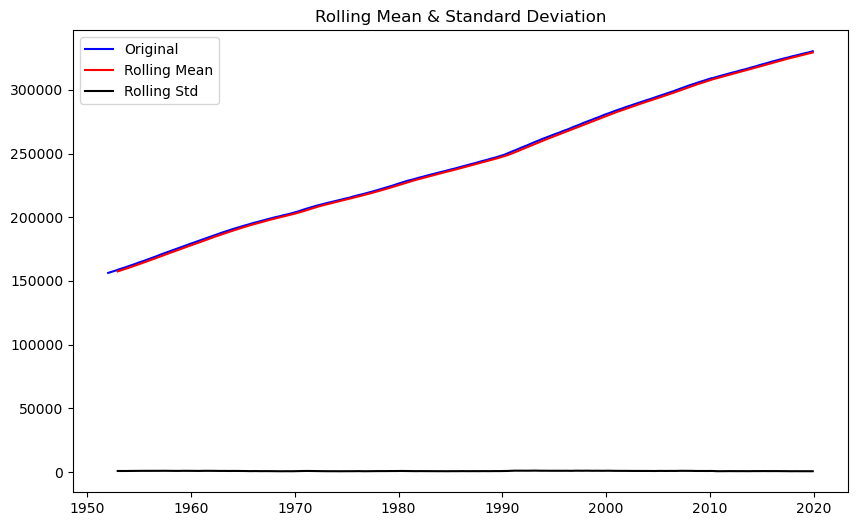

In [15]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['population'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -0.665317
p-value                          0.855530
#Lags Used                      17.000000
Number of Observations Used    798.000000
Critical Value (1%)             -3.438571
Critical Value (5%)             -2.865169
Critical Value (10%)            -2.568702
dtype: float64
